# Restauring and colorizing old photos

### Part 1: restoring old photos

In [1]:
!git clone https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life.git photo_restoration

Cloning into 'photo_restoration'...
remote: Enumerating objects: 379, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 379 (delta 31), reused 40 (delta 13), pack-reused 314
Receiving objects: 100% (379/379), 16.95 MiB | 49.16 MiB/s, done.
Resolving deltas: 100% (147/147), done.


In [2]:
# pull the syncBN repo
%cd photo_restoration/Face_Enhancement/models/networks
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../../

%cd Global/detection_models
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../

# download the landmark detection model
%cd Face_Detection/
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
%cd ../

# download the pretrained model
%cd Face_Enhancement/
!wget https://facevc.blob.core.windows.net/zhanbo/old_photo/pretrain/Face_Enhancement/checkpoints.zip
!unzip checkpoints.zip
%cd ../

%cd Global/
!wget https://facevc.blob.core.windows.net/zhanbo/old_photo/pretrain/Global/checkpoints.zip
!unzip checkpoints.zip
%cd ../

/content/photo_restoration/Face_Enhancement/models/networks
Cloning into 'Synchronized-BatchNorm-PyTorch'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 188 (delta 11), reused 12 (delta 5), pack-reused 161
Receiving objects: 100% (188/188), 46.58 KiB | 15.53 MiB/s, done.
Resolving deltas: 100% (107/107), done.
/content/photo_restoration
/content/photo_restoration/Global/detection_models
Cloning into 'Synchronized-BatchNorm-PyTorch'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 188 (delta 11), reused 12 (delta 5), pack-reused 161
Receiving objects: 100% (188/188), 46.58 KiB | 15.53 MiB/s, done.
Resolving deltas: 100% (107/107), done.
/content/photo_restoration
/content/photo_restoration/Face_Detection
--2021-04-18 08:51:40--  http://dlib.net/files/shape_predictor_68_face_landmark

In [3]:
! pip install -r requirements.txt

     |████████████████████████████████| 122kB 21.4MB/s 


#### Running the code

In [4]:
%cd /content/photo_restoration/
input_folder = "test_images/old"
output_folder = "output"

import os
basepath = os.getcwd()
input_path = os.path.join(basepath, input_folder)
output_path = os.path.join(basepath, output_folder)
os.mkdir(output_path)

!python run.py --input_folder /content/photo_restoration/test_images/old --output_folder /content/photo_restoration/output/ --GPU 0

/content/photo_restoration
Running Stage 1: Overall restoration
Now you are processing a.png
Now you are processing b.png
Now you are processing c.png
Now you are processing d.png
Now you are processing e.png
Now you are processing f.png
Now you are processing g.png
Now you are processing h.png
Finish Stage 1 ...


Running Stage 2: Face Detection
1
1
1
1
Finish Stage 2 ...


Running Stage 3: Face Enhancement
The main GPU is 
0
dataset [FaceTestDataset] of size 4 was created
The size of the latent vector size is [8,8]
Network [SPADEGenerator] was created. Total number of parameters: 92.1 million. To see the architecture, do print(network).
hi :)
Finish Stage 3 ...


Running Stage 4: Blending
Finish Stage 4 ...


All the processing is done. Please check the results.


In [5]:
import io
import IPython.display
import numpy as np
import PIL.Image

def imshow(a, format='png', jpeg_fallback=True):
    a = np.asarray(a, dtype=np.uint8)
    data = io.BytesIO()
    PIL.Image.fromarray(a).save(data, format)
    im_data = data.getvalue()
    try:
      disp = IPython.display.display(IPython.display.Image(im_data))
    except IOError:
      if jpeg_fallback and format != 'jpeg':
        print(('Warning: image was too large to display in format "{}"; '
              'trying jpeg instead.').format(format))
        return imshow(a, format='jpeg')
      else:
        raise
    return disp

def make_grid(I1, I2, resize=True):
    I1 = np.asarray(I1)
    H, W = I1.shape[0], I1.shape[1]
    
    if I1.ndim >= 3:
        I2 = np.asarray(I2.resize((W,H)))
        I_combine = np.zeros((H,W*2,3))
        I_combine[:,:W,:] = I1[:,:,:3]
        I_combine[:,W:,:] = I2[:,:,:3]
    else:
        I2 = np.asarray(I2.resize((W,H)).convert('L'))
        I_combine = np.zeros((H,W*2))
        I_combine[:,:W] = I1[:,:]
        I_combine[:,W:] = I2[:,:]
    I_combine = PIL.Image.fromarray(np.uint8(I_combine))

    W_base = 600
    if resize:
      ratio = W_base / (W*2)
      H_new = int(H * ratio)
      I_combine = I_combine.resize((W_base, H_new), PIL.Image.LANCZOS)

    return I_combine

In [ ]:
#filenames = os.listdir(os.path.join(input_path))
#filenames.sort()

#for filename in filenames:
#    print(filename)
#    image_original = PIL.Image.open(os.path.join(input_path, filename))
#    image_restore = PIL.Image.open(os.path.join(output_path, 'final_output', filename))

#    display(make_grid(image_original, image_restore))

In [ ]:
#input_folder = "test_images/old_w_scratch"
#output_folder = "output"
#input_path = os.path.join(basepath, input_folder)
#output_path = os.path.join(basepath, output_folder)

#filenames = os.listdir(os.path.join(input_path))
#filenames.sort()

#for filename in filenames:
#    print(filename)
#    image_original = PIL.Image.open(os.path.join(input_path, filename))
#    image_restore = PIL.Image.open(os.path.join(output_path, 'final_output', filename))

#    display(make_grid(image_original, image_restore))

In [14]:
from google.colab import files
import shutil

upload_path = os.path.join(basepath, "test_images", "upload")
upload_output_path = os.path.join(basepath, "upload_output")

if os.path.isdir(upload_output_path):
    shutil.rmtree(upload_output_path)

if os.path.isdir(upload_path):
    shutil.rmtree(upload_path)

os.mkdir(upload_output_path)
os.mkdir(upload_path)

uploaded = files.upload()
for filename in uploaded.keys():
    shutil.move(os.path.join(basepath, filename), os.path.join(upload_path, filename))

Saving familia02.jpeg to familia02.jpeg


Run the processing with:

In [15]:
!python run.py --input_folder /content/photo_restoration/test_images/upload --output_folder /content/photo_restoration/upload_output --GPU 0

Running Stage 1: Overall restoration
Now you are processing familia02.jpeg
Skip familia02.jpeg due to an error:
CUDA out of memory. Tried to allocate 154.00 MiB (GPU 0; 14.76 GiB total capacity; 13.40 GiB already allocated; 31.75 MiB free; 13.69 GiB reserved in total by PyTorch)
Finish Stage 1 ...


Running Stage 2: Face Detection
Finish Stage 2 ...


Running Stage 3: Face Enhancement
The main GPU is 
0
dataset [FaceTestDataset] of size 0 was created
The size of the latent vector size is [8,8]
Network [SPADEGenerator] was created. Total number of parameters: 92.1 million. To see the architecture, do print(network).
hi :)
Finish Stage 3 ...


Running Stage 4: Blending
Finish Stage 4 ...


All the processing is done. Please check the results.


### Visualize

Now you have all your results under the folder `upload_output` and you can *manually* right click and download them.

Here we use the child photos of celebrities from https://www.boredpanda.com/childhood-celebrities-when-they-were-young-kids/?utm_source=google&utm_medium=organic&utm_campaign=organic 

In [16]:
filenames_upload = os.listdir(os.path.join(upload_path))
filenames_upload.sort()

filenames_upload_output = os.listdir(os.path.join(upload_output_path, "final_output"))
filenames_upload_output.sort()

for filename, filename_output in zip(filenames_upload, filenames_upload_output):
    image_original = PIL.Image.open(os.path.join(upload_path, filename))
    image_restore = PIL.Image.open(os.path.join(upload_output_path, "final_output", filename_output))

    display(make_grid(image_original, image_restore))
    print("")

#### Download your results



In [17]:
output_folder = os.path.join(upload_output_path, "final_output")
print(output_folder)
os.system(f"zip -r -j download.zip {output_folder}/*")
files.download("download.zip")

/content/photo_restoration/upload_output/final_output


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Part 2: Giving color to an old photo

In [18]:
!git clone https://github.com/jantic/DeOldify.git DeOldify 

Cloning into 'DeOldify'...
remote: Enumerating objects: 2246, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 2246 (delta 6), reused 6 (delta 3), pack-reused 2228
Receiving objects: 100% (2246/2246), 69.42 MiB | 36.38 MiB/s, done.
Resolving deltas: 100% (1014/1014), done.


In [19]:
cd DeOldify

/content/photo_restoration/DeOldify


In [20]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

In [21]:
!pip install -r colab_requirements.txt

     |████████████████████████████████| 215kB 27.2MB/s 
     |████████████████████████████████| 133kB 54.1MB/s 
     |████████████████████████████████| 1.9MB 24.2MB/s 
     |████████████████████████████████| 81kB 11.0MB/s 
  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp37-none-any.whl size=6083 sha256=b330fac553ab4ea41fb798363f9b7c0b4aabab1595a608e21ae8608e8fbb5efd
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
  Created wheel for typing: filename=typing-3.7.4.3-cp37-none-any.whl size=26308 sha256=2a1fd610697b358142d192e9e2c649dddb4680c01cec2a813d3420dd4195c68f
  Stored in directory: /root/.cache/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
Successfully built ffmpeg typing
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
  Found existing installation: tensorboardX 2.2
    Uninstalling tensorboardX-2.2:
      Successfully unins

In [22]:
import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

In [23]:
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth

--2021-04-18 09:08:50--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 138.201.36.183
Connecting to data.deepai.org (data.deepai.org)|138.201.36.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  32.7MB/s    in 8.0s    

2021-04-18 09:08:58 (30.5 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



In [24]:
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

--2021-04-18 09:09:02--  https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9210 (9.0K) [image/png]
Saving to: ‘./resource_images/watermark.png’

./resource_images/w 100%[===================>]   8.99K  --.-KB/s    in 0s      

2021-04-18 09:09:02 (78.0 MB/s) - ‘./resource_images/watermark.png’ saved [9210/9210]



In [25]:
colorizer = get_image_colorizer(artistic=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


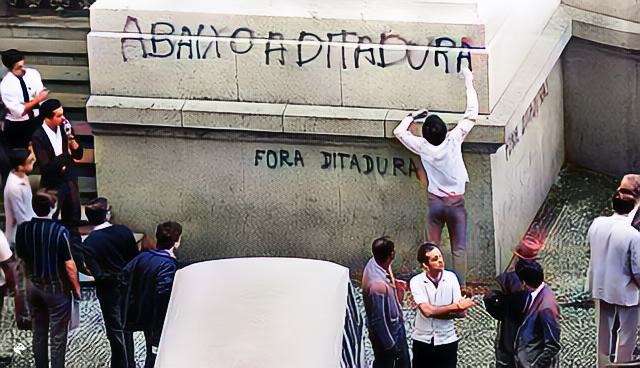

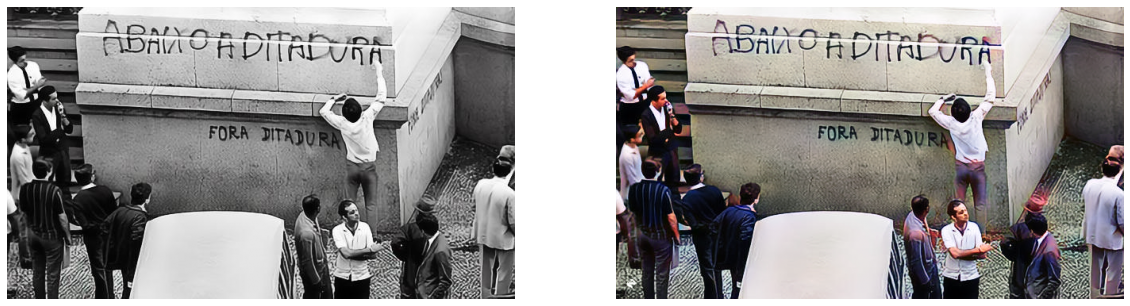

In [28]:
source_url = 'https://github.com/hugofitipaldi/deeplearning_oldphotos/blob/main/images/outputs_GAN_restoration/ditadura02.jpeg?raw=true' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = True #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

In [29]:
source_url = 'https://github.com/hugofitipaldi/deeplearning_oldphotos/blob/main/images/outputs_GAN_restoration/ditadura03.jpeg?raw=true' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = True #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

Output hidden; open in https://colab.research.google.com to view.

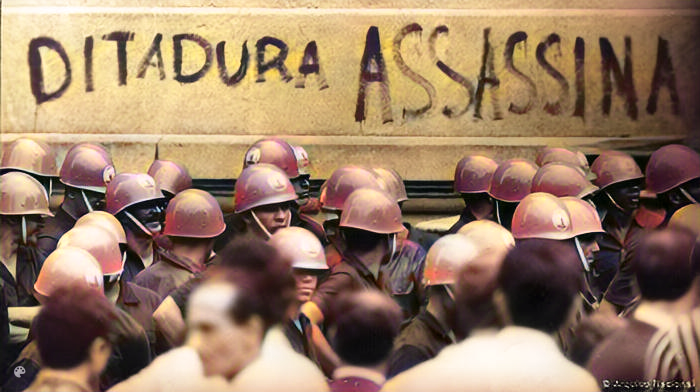

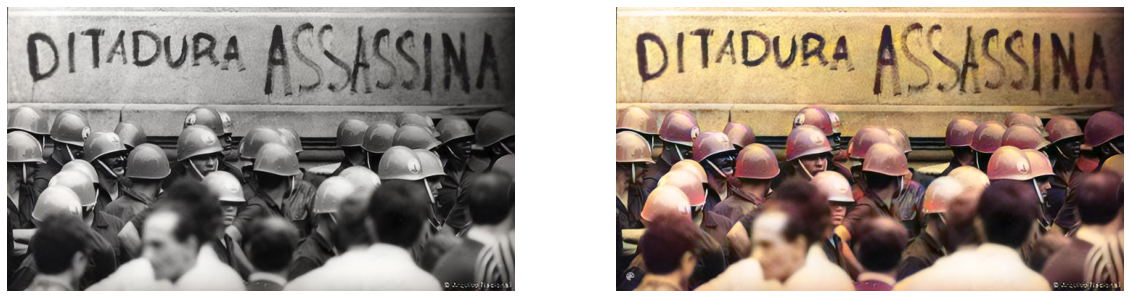

In [31]:
source_url = 'https://github.com/hugofitipaldi/deeplearning_oldphotos/blob/main/images/outputs_GAN_restoration/ditadura04.jpeg?raw=true' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = True #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

In [33]:
source_url = 'https://github.com/hugofitipaldi/deeplearning_oldphotos/blob/main/images/outputs_GAN_restoration/ditadura05.jpeg?raw=true' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = True #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

Output hidden; open in https://colab.research.google.com to view.

In [35]:
source_url = 'https://github.com/hugofitipaldi/deeplearning_oldphotos/blob/main/images/outputs_GAN_restoration/familia01.jpeg?raw=true' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = False #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

Output hidden; open in https://colab.research.google.com to view.

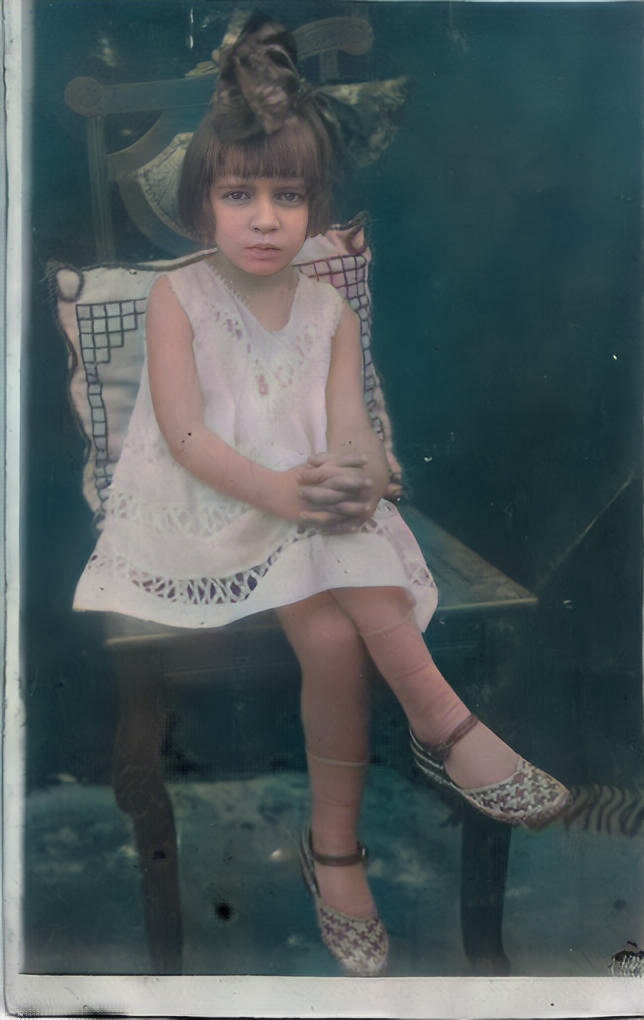

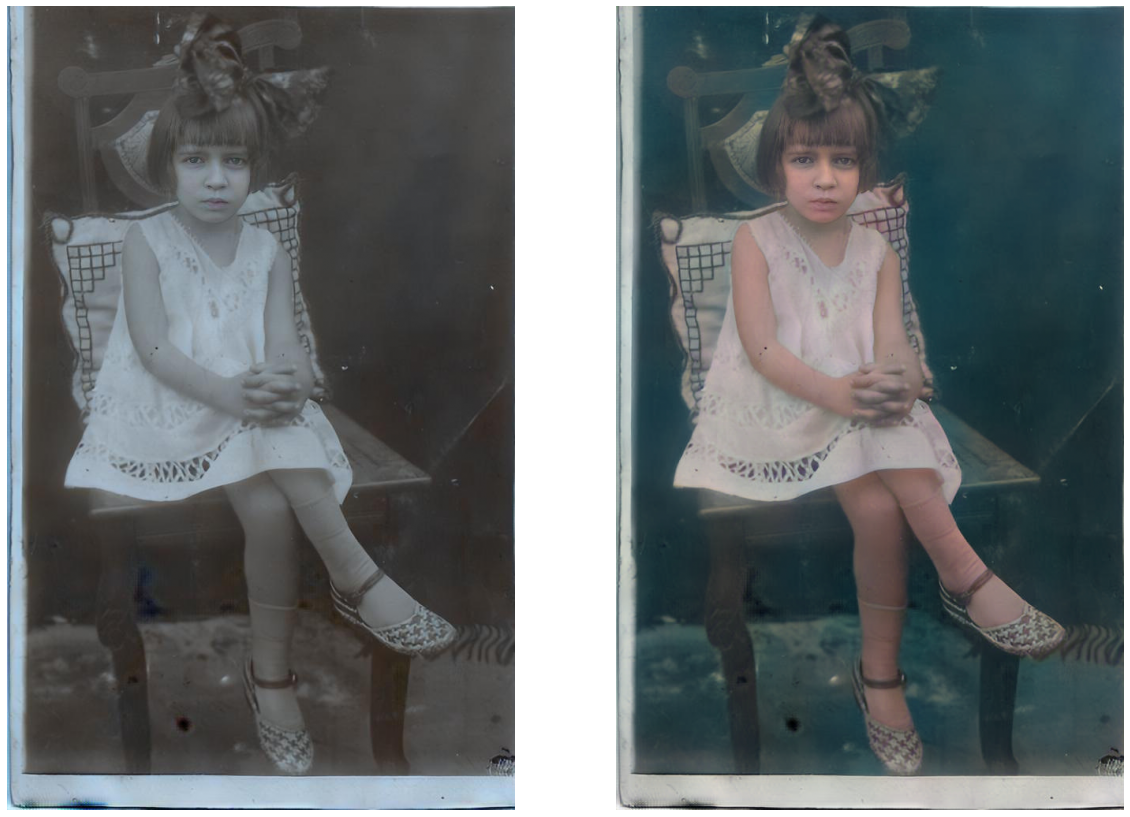

In [36]:
source_url = 'https://github.com/hugofitipaldi/deeplearning_oldphotos/blob/main/images/outputs_GAN_restoration/familia03.jpeg?raw=true' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = False #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

In [37]:
source_url = 'https://github.com/hugofitipaldi/deeplearning_oldphotos/blob/main/images/outputs_GAN_restoration/familia04.jpeg?raw=true' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = False #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

Output hidden; open in https://colab.research.google.com to view.

In [39]:
source_url = 'https://github.com/hugofitipaldi/deeplearning_oldphotos/blob/main/images/outputs_GAN_restoration/familia05.jpeg?raw=true' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = False #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

Output hidden; open in https://colab.research.google.com to view.

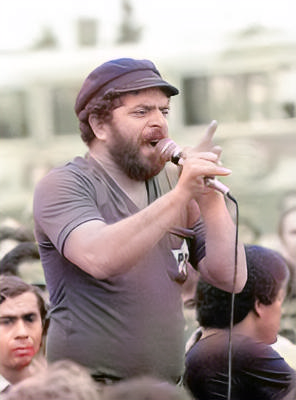

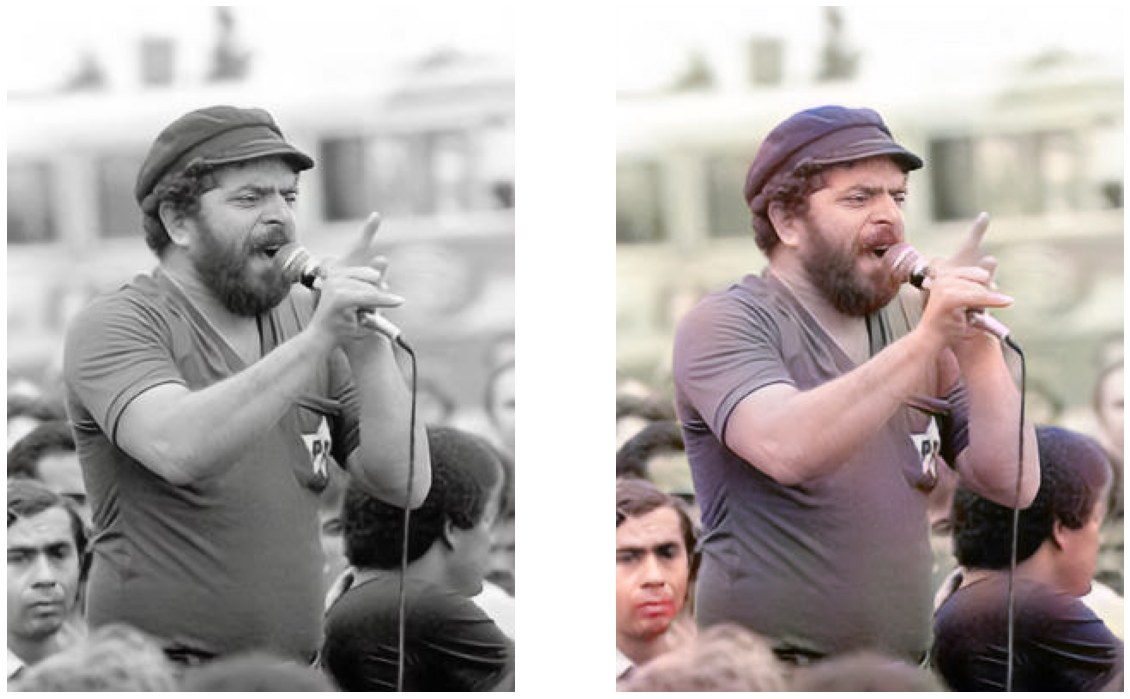

In [40]:
source_url = 'https://github.com/hugofitipaldi/deeplearning_oldphotos/blob/main/images/outputs_GAN_restoration/lula01.jpeg?raw=true' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = False #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

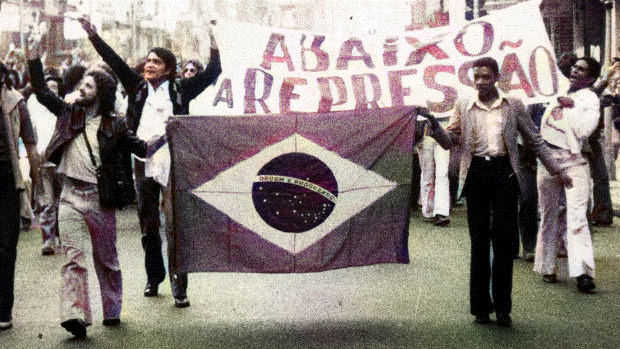

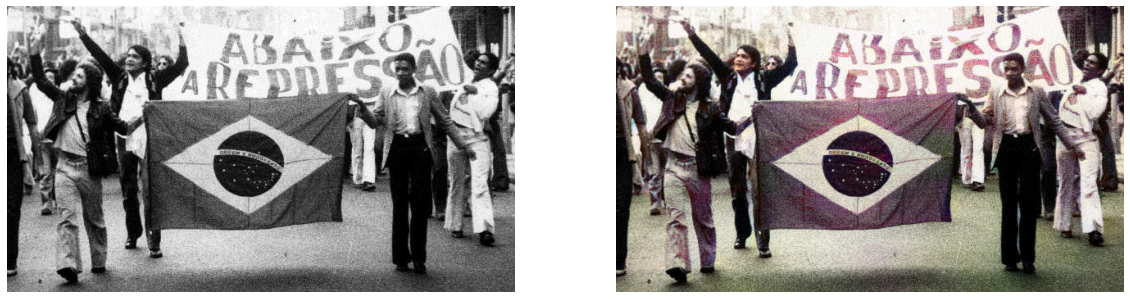

In [47]:
source_url = 'https://cdn1.unasp.br/blog/wp-content/uploads/2014/02/24200800/ditadura-militar-brasil-1977.jpg' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = False #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

In [43]:
source_url = 'https://github.com/hugofitipaldi/deeplearning_oldphotos/blob/main/images/outputs_GAN_restoration/mariabonita01.jpeg?raw=true' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = False #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

Output hidden; open in https://colab.research.google.com to view.